In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

In [ ]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


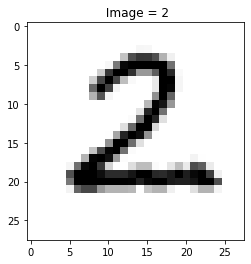

In [ ]:
index = 50230
plt.imshow(X_train[index], cmap = plt.cm.binary)
plt.title(" Image = {}".format(Y_train[index]))
plt.show()

In [ ]:
import numpy as np

x_train_norm = X_train / X_train.max()
x_test_norm = X_test / X_test.max()

print(f'최솟값 : {x_train_norm.min()}\n최댓값 : {x_train_norm.max()}')

최솟값 : 0.0
최댓값 : 1.0


In [ ]:
x_train = x_train_norm.reshape([x_train_norm.shape[0],x_train_norm.shape[1]*x_train_norm.shape[2]]).astype('float32')
x_test = x_test_norm.reshape([x_test_norm.shape[0],x_test_norm.shape[1]*x_test_norm.shape[2]]).astype('float32')

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 모델 설계 
activation_function ='relu'

input_Layer = tf.keras.layers.Input(shape=(28*28,))
x = tf.keras.layers.Dense(512,activation = activation_function,kernel_initializer=tf.keras.initializers.he_normal())(input_Layer)
x = tf.keras.layers.Dense(256,activation = activation_function,kernel_initializer=tf.keras.initializers.glorot_uniform())(x)
output_layer = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = [input_Layer],outputs = [output_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# layer 길이 선언
print(len(model.layers))

4


In [ ]:
# 모델 컴파일
loss= tf.keras.losses.categorical_crossentropy
optimizer =tf.keras.optimizers.Adam()
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=metric)


In [ ]:
# 베스트 모델 저장을 위한 디렉토리 선언
MODEL_DIR = '/content/drive/MyDrive/YGL/10.27/model_result/MNIST_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

## 저장한 모델의 주소와 이름.
modelpath= MODEL_DIR + "/10.28{epoch:02d}-{val_loss:.4f}.hdf5"

In [ ]:
## 사용할 callback 함수 선언.
callback_list=[tf.keras.callbacks.ModelCheckpoint(modelpath)]

# 모델의 실행
#  validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(x_train,y_train,epochs=10,batch_size = 200,validation_split = 0.1,verbose =1, callbacks = callback_list)


Epoch 1/10
270/270 [==============================] - 5s 15ms/step - loss: 0.2674 - categorical_accuracy: 0.9221 - val_loss: 0.1084 - val_categorical_accuracy: 0.9675
Epoch 2/10
270/270 [==============================] - 4s 14ms/step - loss: 0.0948 - categorical_accuracy: 0.9709 - val_loss: 0.0799 - val_categorical_accuracy: 0.9765
Epoch 3/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0583 - categorical_accuracy: 0.9821 - val_loss: 0.0715 - val_categorical_accuracy: 0.9815
Epoch 4/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0395 - categorical_accuracy: 0.9877 - val_loss: 0.0761 - val_categorical_accuracy: 0.9785
Epoch 5/10
 16/270 [>.............................] - ETA: 3s - loss: 0.0230 - categorical_accuracy: 0.9922

In [ ]:
# 테스트 정확도 출력
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\n Test Accuracy: %.4f" %test_accuracy)
print("\n Test Loss    : %.4f"%test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0823 - categorical_accuracy: 0.9804

 Test Accuracy: 0.9804

 Test Loss    : 0.0823


In [ ]:
#예측
predicted_result = model.predict(x_test)
predicted_label = np.argmax(predicted_result,axis =1)

In [ ]:
idx = 0
print("mdoel.predict() 결과:",predicted_result[idx])
print("model이 추론한 가장 가능성이 큰 결과 ",predicted_label[idx])
print("실제 데이터의 라벨 ",np.argmax(y_test[idx],axis =0))

mdoel.predict() 결과: [8.1868296e-13 1.8195333e-10 2.5727703e-10 5.2318221e-09 2.8842175e-15
 1.9032007e-12 3.5087218e-17 1.0000000e+00 2.9989106e-12 5.0482067e-09]
model이 추론한 가장 가능성이 큰 결과  7
실제 데이터의 라벨  7


In [ ]:
str(predicted_label[idx])

'7'

No handles with labels found to put in legend.


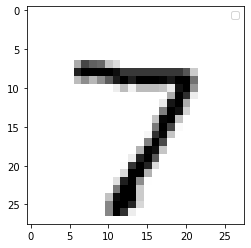

In [ ]:
plt.imshow(x_test[idx].reshape(28,28),label =f'predict :{str(predicted_label[idx])}' ,cmap = 'binary')
plt.legend()
plt.show()

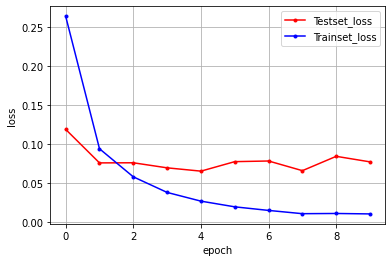

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
